In [ ]:
import pandas as pd
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import pydotplus
from sklearn.externals.six import StringIO 
from IPython.display import Image
from sklearn import tree
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import pydotplus
from sklearn.externals.six import StringIO 
from IPython.display import Image
from sklearn import tree
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import plotly.graph_objects as go
from sklearn.linear_model import LogisticRegression

from sklearn.utils import resample
from sklearn.metrics import precision_score
from sklearn.metrics import  recall_score
from sklearn.metrics import  f1_score
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from random import seed
from sklearn.ensemble import VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import  StandardScaler

from xgboost import plot_importance
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
import itertools
from sklearn.metrics import cohen_kappa_score, make_scorer

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving export.csv to export (1).csv


{'export.csv': b'months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported\n328,48,521585,2014-10-17 00:00:00,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25 00:00:00,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y\n228,42,342868,2006-06-27 00:00:00,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machi

In [ ]:
insurance=pd.read_csv('export.csv')
insurance.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17 00:00:00,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25 00:00:00,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27 00:00:00,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21 00:00:00,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06 00:00:00,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22 00:00:00,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25 00:00:00,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10 00:00:00,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06 00:00:00,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17 00:00:00,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [ ]:
insurance.shape

(1000, 39)

In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [ ]:
insurance.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [ ]:
z=insurance.select_dtypes(include='object')

In [ ]:
z.shape

(1000, 21)

In [ ]:
insurance['incident_date']=pd.to_datetime(insurance['incident_date'])

In [ ]:
insurance['policy_bind_date']=pd.to_datetime(insurance['policy_bind_date'])

In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

In [ ]:
insurance['accident_date_since_policy_bind_date']=insurance['policy_bind_date']-insurance['incident_date']

In [ ]:
pd.crosstab(insurance['accident_date_since_policy_bind_date'],insurance['fraud_reported'])

fraud_reported,N,Y
accident_date_since_policy_bind_date,,
-9172 days,1,0
-9155 days,1,0
-9133 days,1,0
-9129 days,1,0
-9124 days,0,1
...,...,...
-46 days,1,0
-35 days,1,0
-22 days,1,0


In [ ]:
insurance.drop(["policy_number","insured_zip","incident_location","policy_deductable","accident_date_since_policy_bind_date"],1,inplace=True)

In [ ]:
insurance.nunique()


months_as_customer             391
age                             46
policy_bind_date               951
policy_state                     3
policy_csl                       3
policy_annual_premium          991
umbrella_limit                  11
insured_sex                      2
insured_education_level          7
insured_occupation              14
insured_hobbies                 20
insured_relationship             6
capital-gains                  338
capital-loss                   354
incident_date                   60
incident_type                    4
collision_type                   4
incident_severity                4
authorities_contacted            5
incident_state                   7
incident_city                    7
incident_hour_of_the_day        24
number_of_vehicles_involved      4
property_damage                  3
bodily_injuries                  3
witnesses                        4
police_report_available          3
total_claim_amount             763
injury_claim        

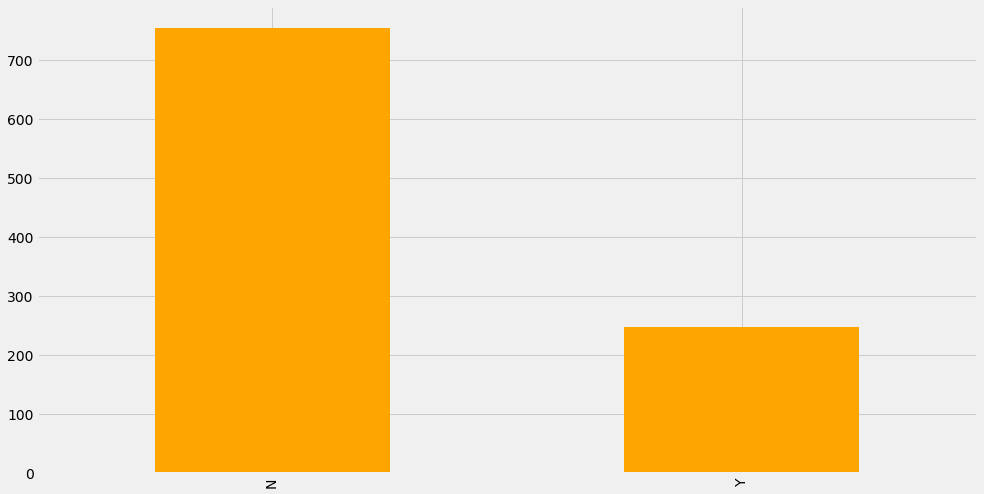

In [ ]:
insurance['fraud_reported'].value_counts().plot(kind='bar',color='orange')

In [ ]:
insurance['csl_per_person']=insurance.policy_csl.str.split('/',expand=True)[0]
insurance['csl_per_accident']=insurance.policy_csl.str.split('/',expand=True)[1]

In [ ]:
insurance.drop('policy_csl',1,inplace=True)

In [ ]:
insurance['incident_state'].value_counts()

NY    262
SC    248
WV    217
NC    110
VA    110
PA     30
OH     23
Name: incident_state, dtype: int64

In [ ]:
pd.crosstab(insurance['incident_state'],insurance['fraud_reported'])

fraud_reported,N,Y
incident_state,,
NC,76,34
NY,204,58
OH,13,10
PA,22,8
SC,175,73
VA,85,25
WV,178,39


In [ ]:
#So South Carolina has maximum no of fraud cases along with New york.

In [ ]:
t1=pd.crosstab(insurance['age'],insurance['fraud_reported'])

In [ ]:
t1

fraud_reported,N,Y
age,,
19,0,1
20,1,0
21,6,0
22,0,1
23,3,4
24,8,2
25,10,4
26,18,8
27,21,3


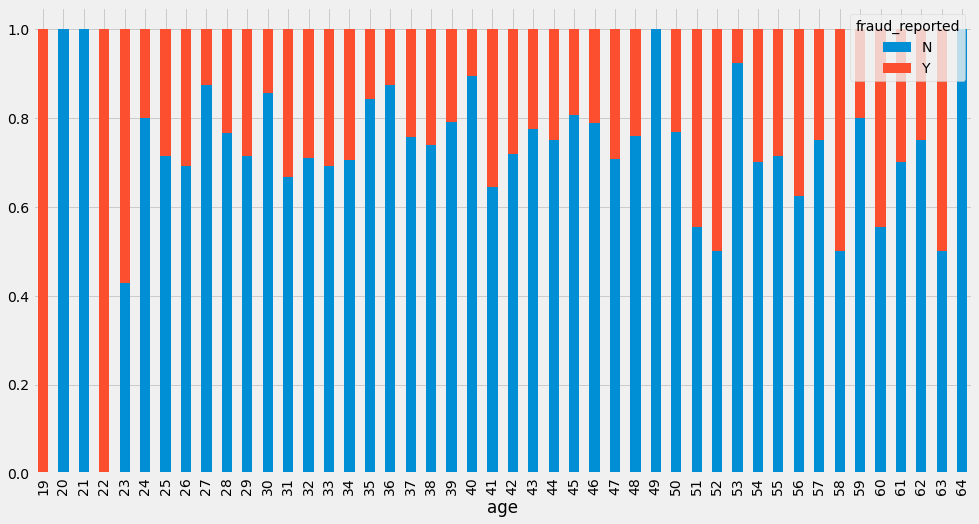

In [ ]:
plt.rcParams['figure.figsize']=[15,8]
ax=plt.style.use('fivethirtyeight')

t1.div(t1.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)

In [ ]:
pd.crosstab(insurance.policy_state,insurance.fraud_reported)

fraud_reported,N,Y
policy_state,,
IL,261,77
IN,231,79
OH,261,91


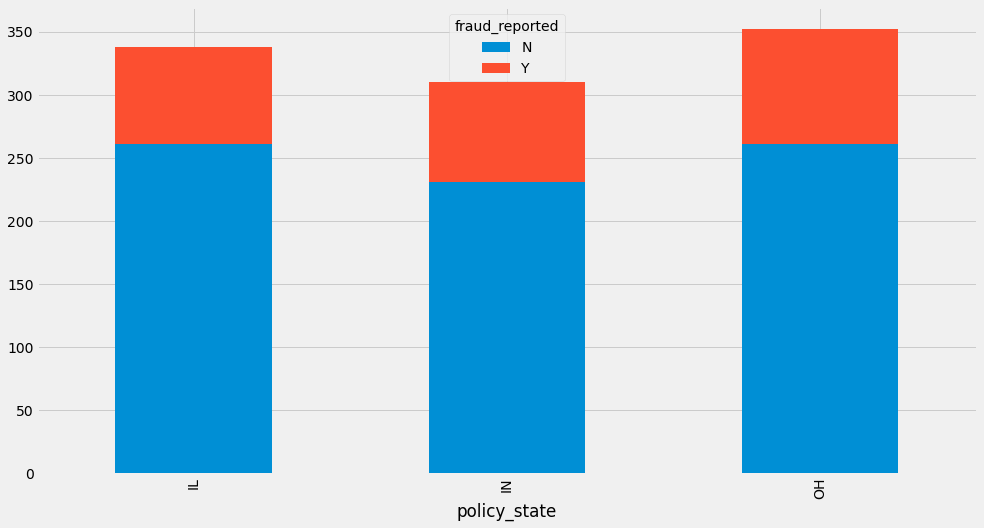

In [ ]:
pd.crosstab(insurance.policy_state,insurance.fraud_reported).plot(kind="bar",stacked=True)

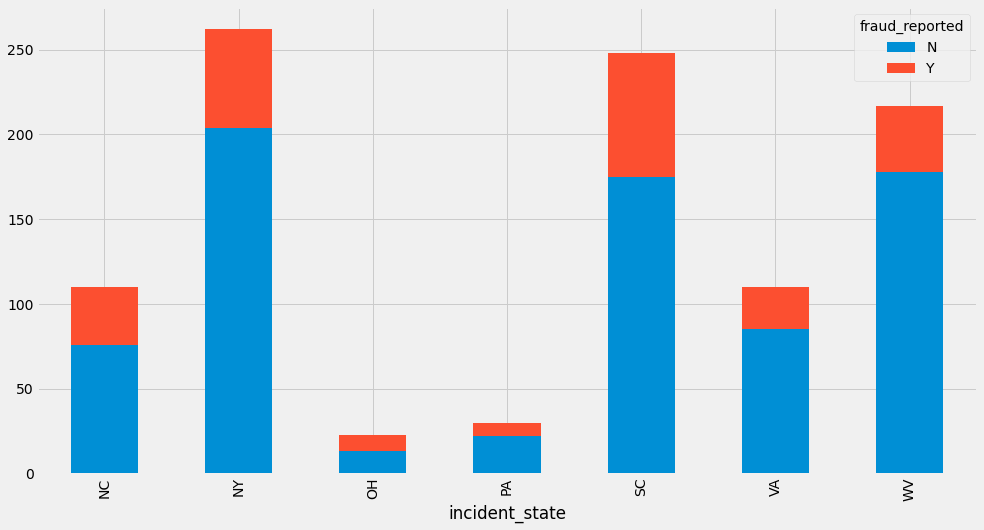

In [ ]:
pd.crosstab(insurance.incident_state,insurance.fraud_reported).plot(kind="bar",stacked=True)

In [ ]:
pd.crosstab(insurance.insured_education_level,insurance.fraud_reported)

fraud_reported,N,Y
insured_education_level,,
Associate,111,34
College,90,32
High School,124,36
JD,119,42
MD,106,38
Masters,111,32
PhD,92,33


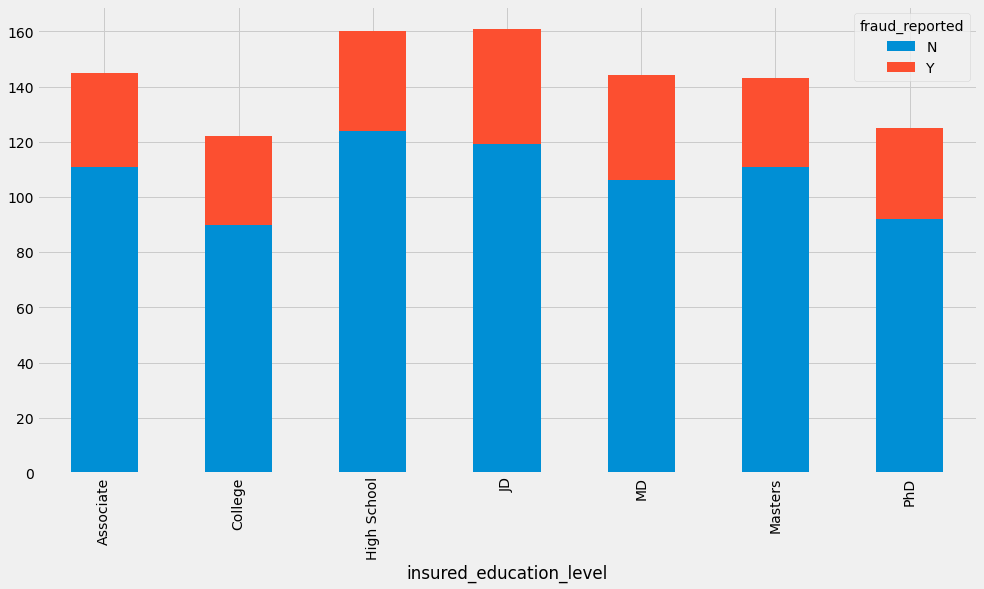

In [ ]:
pd.crosstab(insurance.insured_education_level,insurance.fraud_reported).plot(kind="bar",stacked=True)

In [ ]:
pd.crosstab(insurance.insured_hobbies,insurance.fraud_reported)

fraud_reported,N,Y
insured_hobbies,,
base-jumping,36,13
basketball,28,6
board-games,34,14
bungie-jumping,47,9
camping,50,5
chess,8,38
cross-fit,9,26
dancing,38,5
exercise,46,11


In [ ]:
#People who play chess and cross fit are more likely to commit fraud

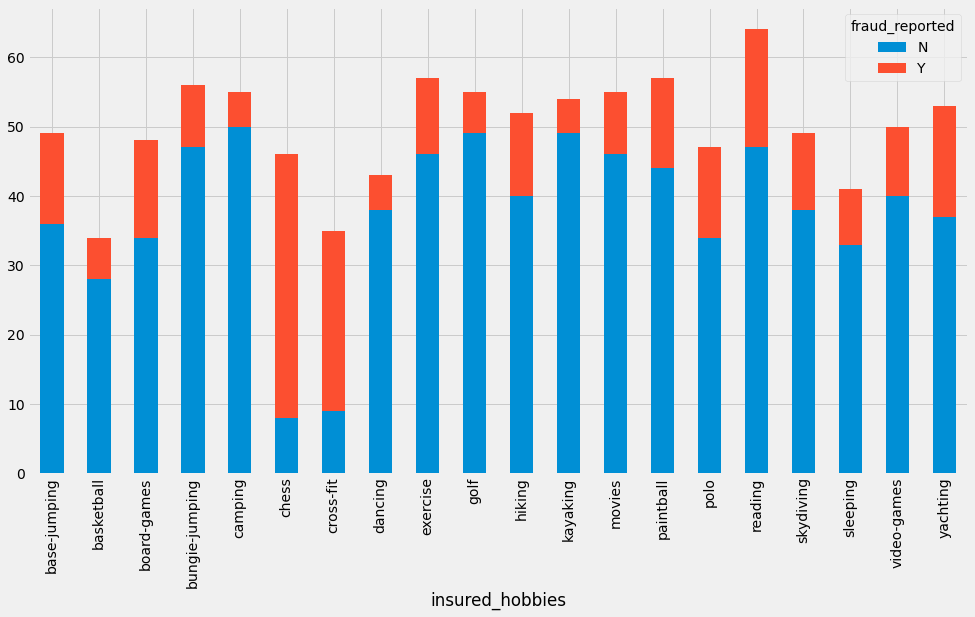

In [ ]:
pd.crosstab(insurance.insured_hobbies,insurance.fraud_reported).plot(kind="bar",stacked=True)

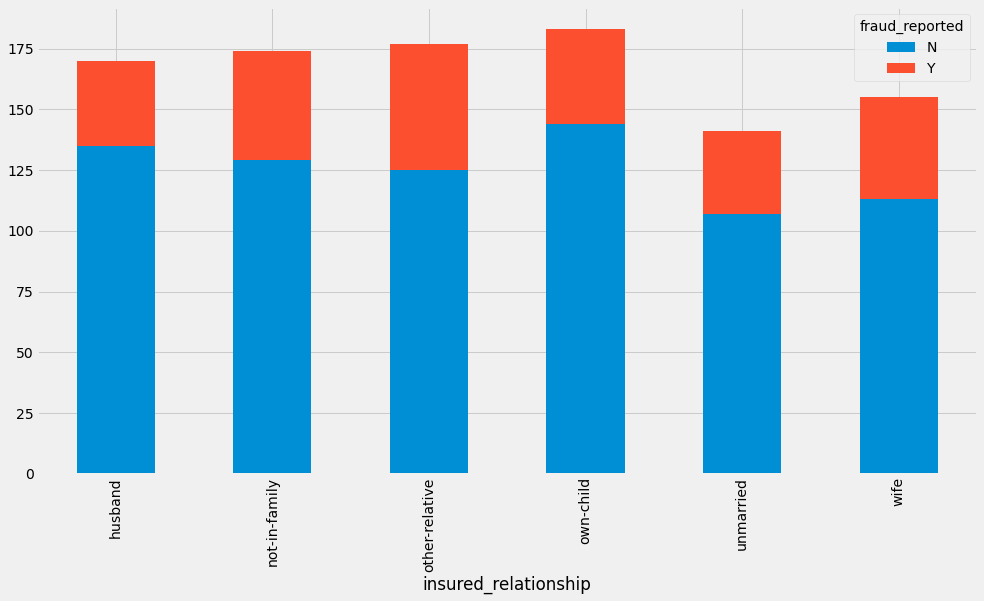

In [ ]:
pd.crosstab(insurance.insured_relationship,insurance.fraud_reported).plot(kind="bar",stacked=True)

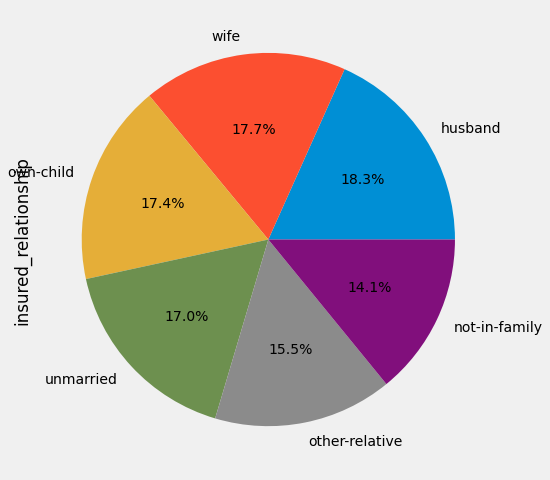

In [ ]:
ax=(insurance['insured_relationship'].value_counts()*100/len(insurance)).plot.pie(autopct='%.1f%%',labels=['husband','wife','own-child','unmarried','other-relative','not-in-family'])

In [ ]:
pd.crosstab(insurance.insured_relationship,insurance.fraud_reported)

fraud_reported,N,Y
insured_relationship,,
husband,135,35
not-in-family,129,45
other-relative,125,52
own-child,144,39
unmarried,107,34
wife,113,42


<Figure size 1080x1080 with 0 Axes>

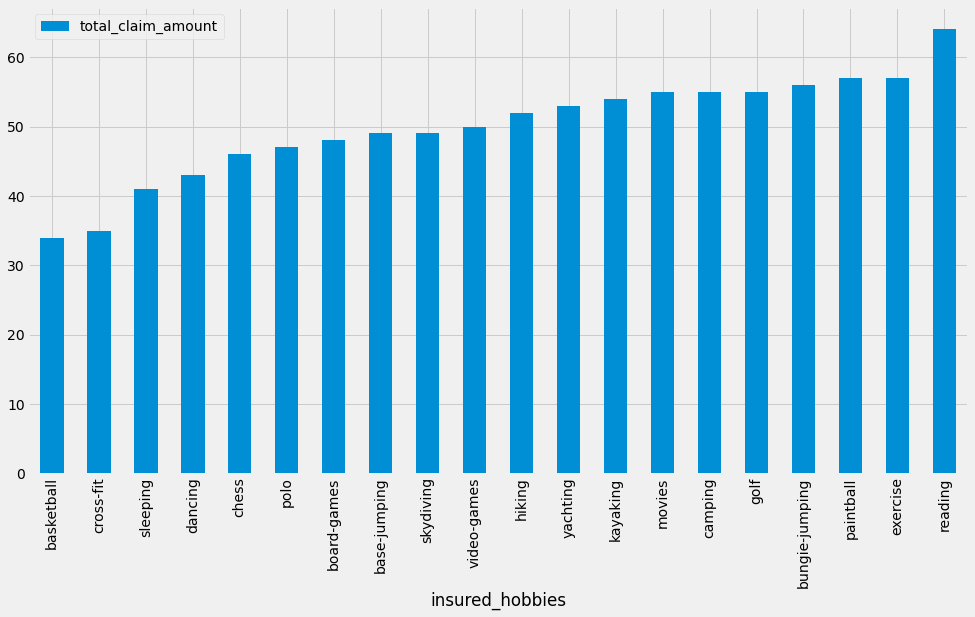

In [ ]:
plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=(15,15))
ax=insurance.groupby('insured_hobbies').agg({'total_claim_amount':'count'}).sort_values(by='total_claim_amount',ascending=True)
ax.plot(kind='bar')

In [ ]:
#people with reading habit have claimed most no of times

In [ ]:
insurance.columns

Index(['months_as_customer', 'age', 'policy_bind_date', 'policy_state',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported', 'csl_per_person', 'csl_per_accident'],
      dtype='object')

In [ ]:
z1=pd.crosstab(insurance.insured_occupation,insurance.fraud_reported)

In [ ]:
z1['percantage_of_claim_fraud']= ((z1['Y'])/(z1['N']+z1['Y']))*100

In [ ]:
z1

fraud_reported,N,Y,percantage_of_claim_fraud
insured_occupation,,,
adm-clerical,54,11,16.923077
armed-forces,52,17,24.637681
craft-repair,52,22,29.729730
exec-managerial,48,28,36.842105
farming-fishing,37,16,30.188679
handlers-cleaners,43,11,20.370370
machine-op-inspct,71,22,23.655914
other-service,59,12,16.901408
priv-house-serv,59,12,16.901408


In [ ]:
#If the person jobe is executive manegarial are more likely to report fraudlent claims

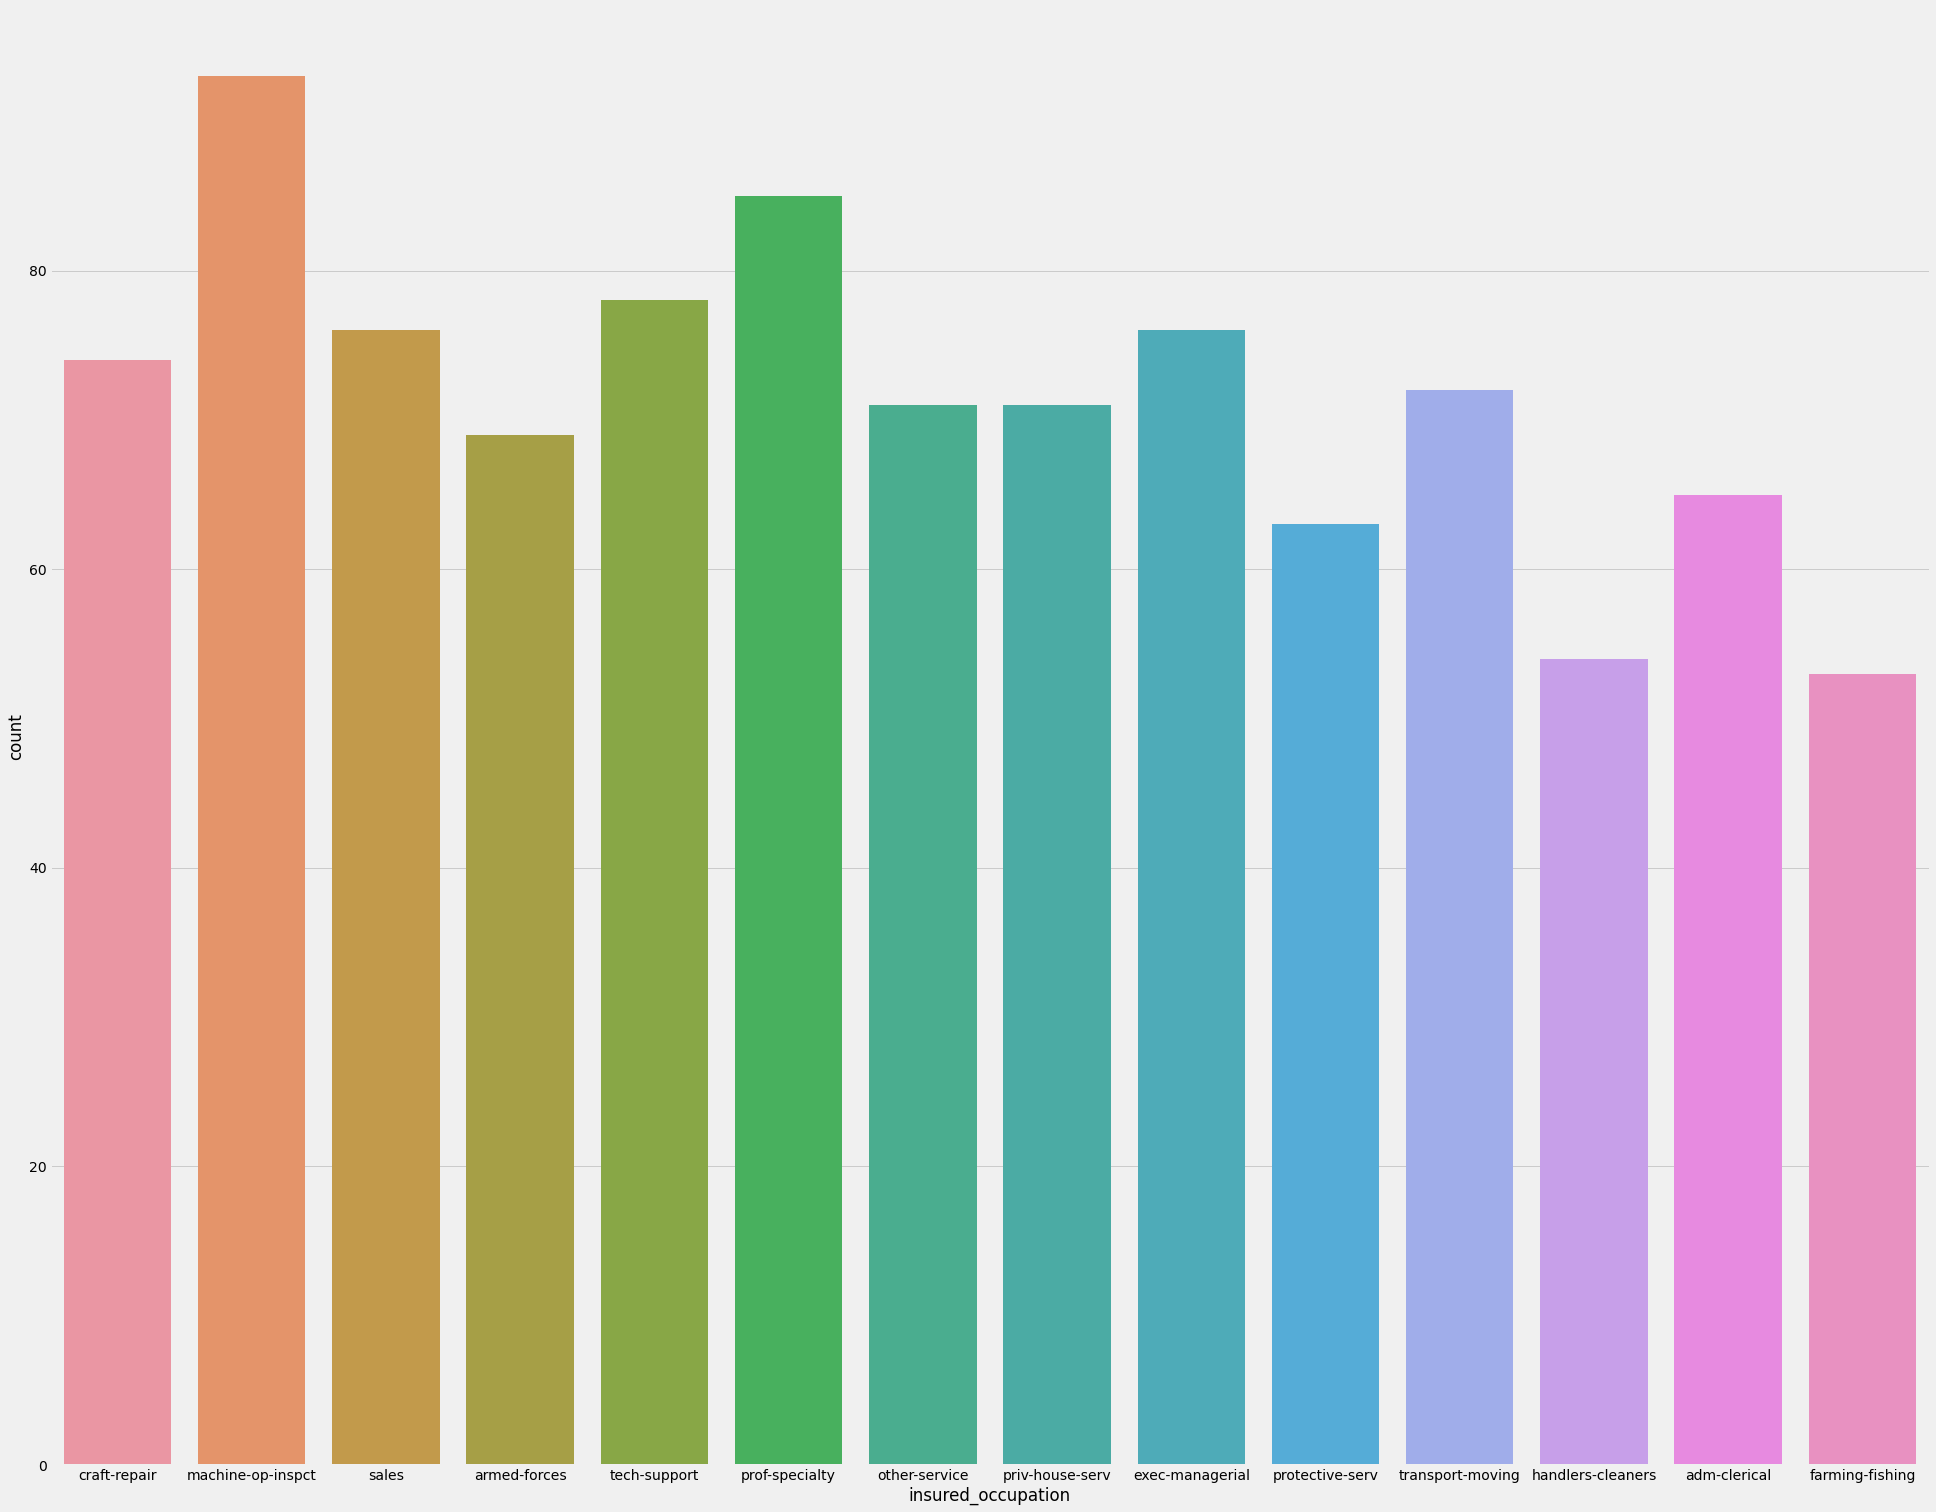

In [ ]:
fig=plt.figure(figsize=(30,25))
sns.countplot(insurance['insured_occupation'])

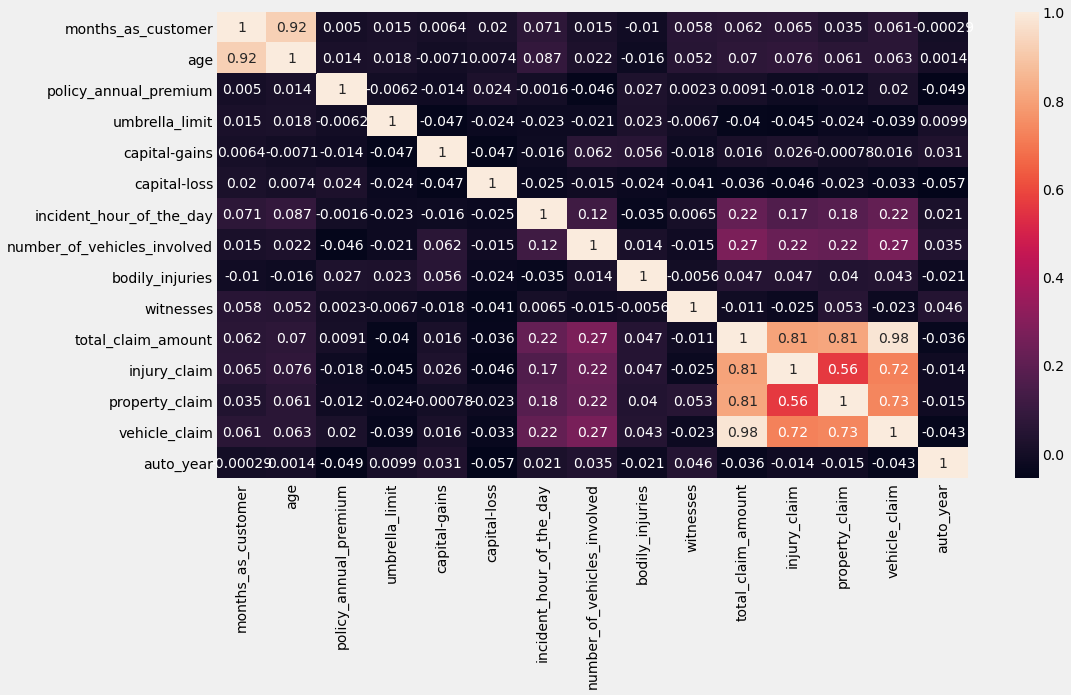

In [ ]:
df=insurance.corr()
sns.heatmap(df,annot=True)

In [ ]:
insurance.columns

Index(['months_as_customer', 'age', 'policy_bind_date', 'policy_state',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported', 'csl_per_person', 'csl_per_accident'],
      dtype='object')

In [ ]:
pd.crosstab(insurance.incident_severity,insurance.fraud_reported)

fraud_reported,N,Y
incident_severity,,
Major Damage,109,167
Minor Damage,316,38
Total Loss,244,36
Trivial Damage,84,6


In [ ]:
#If the damage was major there was high chance that it will be fraudlent

In [ ]:
pd.crosstab(insurance.incident_type,insurance.fraud_reported)

fraud_reported,N,Y
incident_type,,
Multi-vehicle Collision,305,114
Parked Car,76,8
Single Vehicle Collision,286,117
Vehicle Theft,86,8


In [ ]:
#If there was a multi vehicle collision and single vehicle collision there is a high likely chance it is going to be fraud.

In [ ]:
pd.crosstab(insurance.collision_type,insurance.fraud_reported)

fraud_reported,N,Y
collision_type,,
?,162,16
Front Collision,184,70
Rear Collision,201,91
Side Collision,206,70


In [ ]:
#If there was a rear collision,there was a high chance that it will be fraudlent

In [ ]:
pd.crosstab(insurance.authorities_contacted,insurance.fraud_reported)

fraud_reported,N,Y
authorities_contacted,,
Ambulance,139,57
Fire,163,60
None,85,6
Other,135,63
Police,231,61


In [ ]:
#In all of the fraudlent cases ,there were only six cases where none of the authorities were contacted.

In [ ]:
z2=pd.crosstab(insurance.incident_city,insurance.fraud_reported)

In [ ]:
z2['percantage_of_claim_citywise']= ((z2['Y'])/(z2['N']+z2['Y']))*100

In [ ]:
z2

fraud_reported,N,Y,percantage_of_claim_citywise
incident_city,,,
Arlington,108,44,28.947368
Columbus,110,39,26.174497
Hillsdale,106,35,24.822695
Northbend,111,34,23.448276
Northbrook,95,27,22.131148
Riverwood,104,30,22.388060
Springfield,119,38,24.203822


In [ ]:
#almost all cities have equal amount of contribution to fraudlent claims

In [ ]:
pd.crosstab(insurance.incident_hour_of_the_day,insurance.fraud_reported)

fraud_reported,N,Y
incident_hour_of_the_day,,
0,40,12
1,21,8
2,21,10
3,41,12
4,38,8
5,24,9
6,30,14
7,32,8
8,30,6


In [ ]:
bins=[-1,3,6,9,12,17,20,24]
names=['past_midnight','early_morning','morning','fore-noon','afternoon','evening','night']
insurance['incident_period_of_the_day']=pd.cut(insurance.incident_hour_of_the_day,bins,labels=names).astype(object)
insurance['incident_period_of_the_day']


0      early_morning
1            morning
2            morning
3      early_morning
4            evening
           ...      
995          evening
996            night
997    early_morning
998    past_midnight
999    early_morning
Name: incident_period_of_the_day, Length: 1000, dtype: object

In [ ]:
pd.crosstab(insurance.incident_period_of_the_day,insurance.fraud_reported)

fraud_reported,N,Y
incident_period_of_the_day,,
afternoon,171,60
early_morning,92,31
evening,83,32
fore-noon,81,35
morning,101,18
night,102,29
past_midnight,123,42


In [ ]:
#the highest amount of fraudlent cases was reported between 12:00 pm to 5:00

In [ ]:
insurance['vehicle_age']=2018-insurance['auto_year']

In [ ]:
insurance['auto_year'].value_counts()

1995    56
1999    55
2005    54
2011    53
2006    53
2007    52
2003    51
2010    50
2009    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64

In [ ]:
pd.crosstab(insurance.vehicle_age,insurance.fraud_reported)

fraud_reported,N,Y
vehicle_age,,
3,36,11
4,32,12
5,34,15
6,37,9
7,36,17
8,43,7
9,39,11
10,35,10
11,34,18


In [ ]:
insurance.groupby('vehicle_age').agg({'fraud_reported':'count'})

,fraud_reported
vehicle_age,
3,47
4,44
5,49
6,46
7,53
8,50
9,50
10,45
11,52


In [ ]:
insurance.columns

Index(['months_as_customer', 'age', 'policy_bind_date', 'policy_state',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported', 'csl_per_person', 'csl_per_accident',
       'incident_period_of_the_day', 'vehicle_age'],
      dtype='object')

In [ ]:
insurance.columns

Index(['months_as_customer', 'age', 'policy_bind_date', 'policy_state',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported', 'csl_per_person', 'csl_per_accident',
       'incident_period_of_the_day', 'vehicle_age'],
      dtype='object')

In [ ]:
insurance.shape

(1000, 38)

In [ ]:
insurance['fraud_reported'].replace(to_replace='Y',value=1,inplace=True)
insurance['fraud_reported'].replace(to_replace='N',value=0,inplace=True)

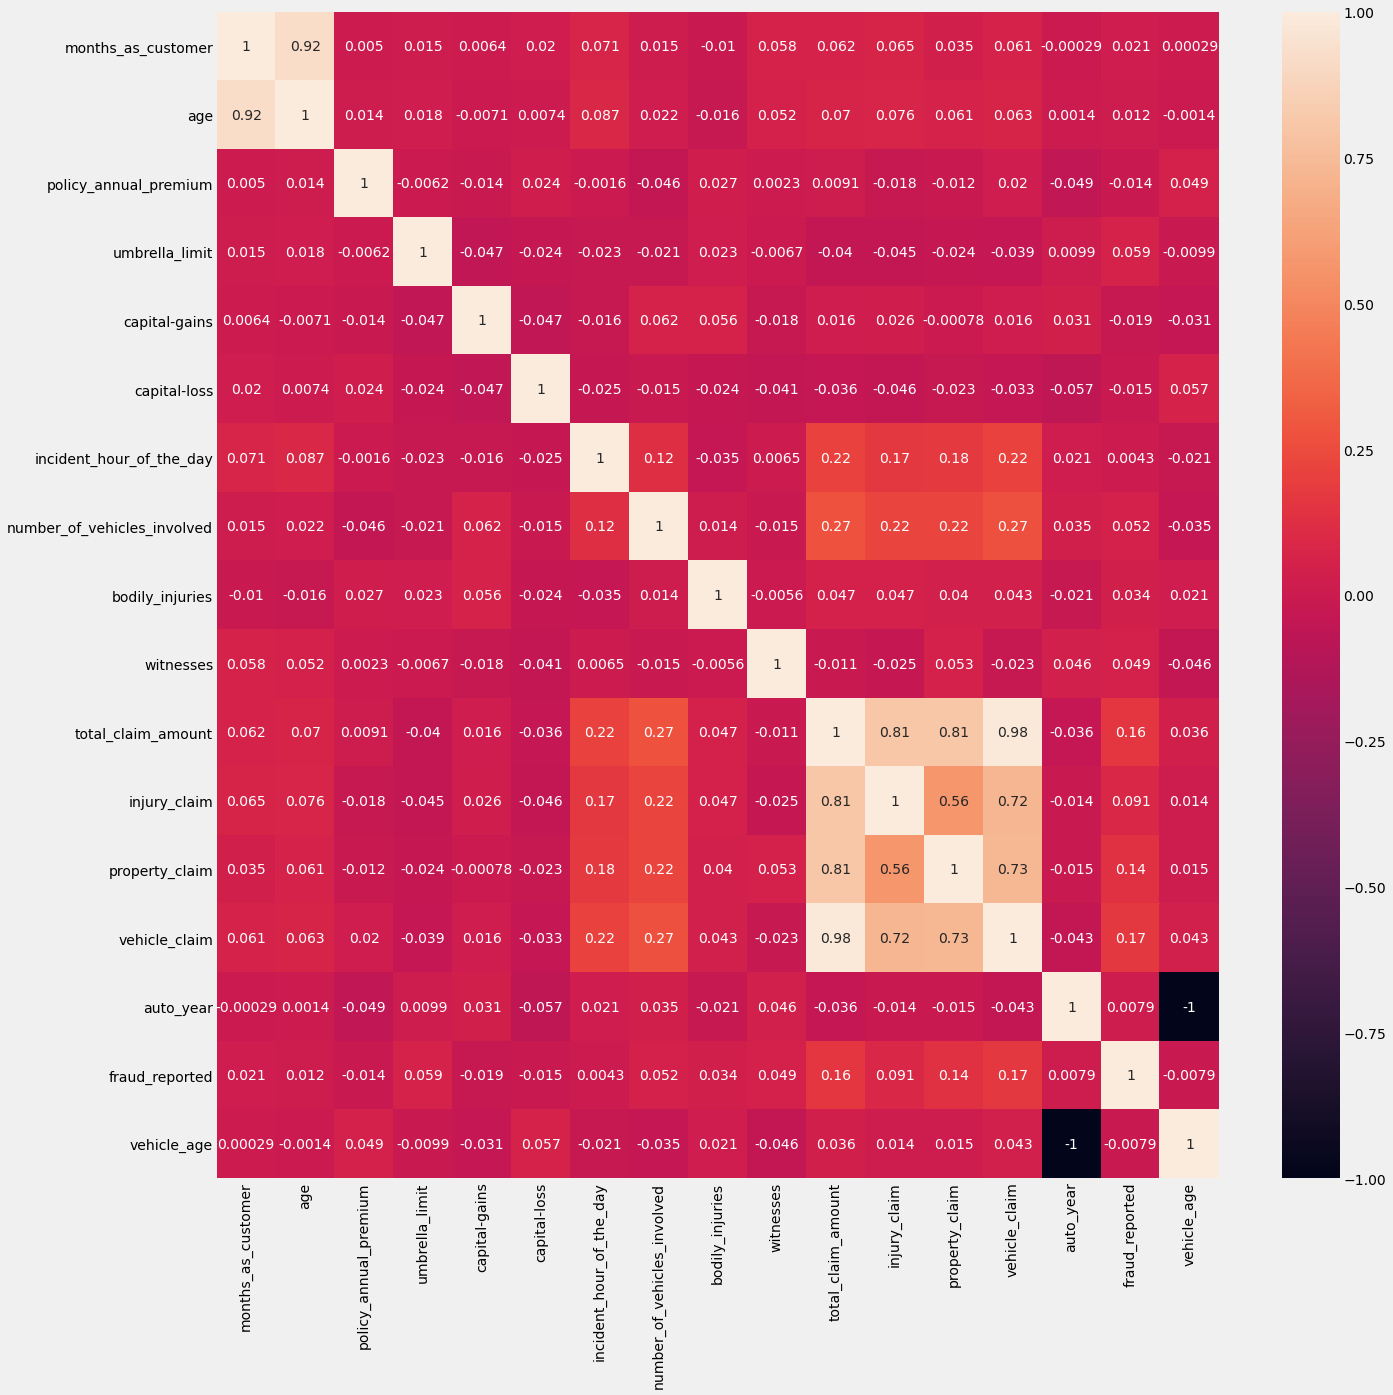

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(insurance.corr(),annot=True)

In [ ]:
insurance.columns

Index(['months_as_customer', 'age', 'policy_bind_date', 'policy_state',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported', 'csl_per_person', 'csl_per_accident',
       'incident_period_of_the_day', 'vehicle_age'],
      dtype='object')

In [ ]:
insurance.auto_model.nunique()

39

In [ ]:
pd.crosstab(insurance.auto_make,insurance.fraud_reported)

fraud_reported,0,1
auto_make,,
Accura,55,13
Audi,48,21
BMW,52,20
Chevrolet,55,21
Dodge,60,20
Ford,50,22
Honda,41,14
Jeep,56,11
Mercedes,43,22


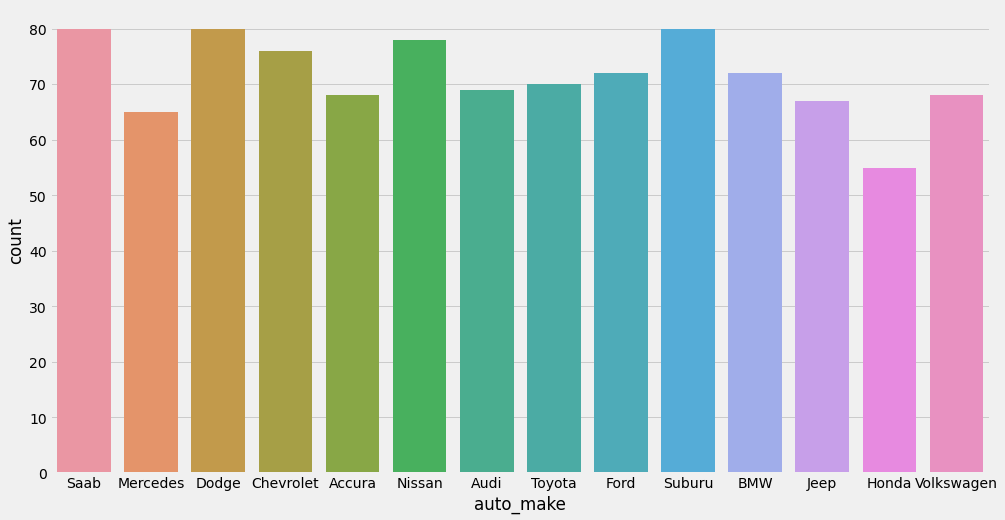

In [ ]:
sns.countplot(insurance.auto_make)

In [ ]:
insurance['day_of_the_accident']=insurance.incident_date.dt.weekday

In [ ]:
pd.crosstab(insurance.day_of_the_accident,insurance.fraud_reported)

fraud_reported,0,1
day_of_the_accident,,
0,96,40
1,109,26
2,113,32
3,109,35
4,108,34
5,119,47
6,99,33


In [ ]:
#Dropping the rows which are not required.

In [ ]:
insurance.drop(['auto_year','policy_bind_date','incident_hour_of_the_day','incident_date','injury_claim','property_claim','vehicle_claim'],1,inplace=True)

In [ ]:
insurance.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_annual_premium',
       'umbrella_limit', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'number_of_vehicles_involved', 'property_damage',
       'bodily_injuries', 'witnesses', 'police_report_available',
       'total_claim_amount', 'auto_make', 'auto_model', 'fraud_reported',
       'csl_per_person', 'csl_per_accident', 'incident_period_of_the_day',
       'vehicle_age', 'day_of_the_accident'],
      dtype='object')

In [ ]:
insurance.shape

(1000, 32)

In [ ]:
insurance.select_dtypes(include=['object']).columns

Index(['policy_state', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'csl_per_person', 'csl_per_accident', 'incident_period_of_the_day'],
      dtype='object')

In [ ]:
unknowns={}
for i in list(insurance.columns):
  if(insurance[i]).dtype==object:
    j=np.sum(insurance[i]=='?')
    unknowns[i]=j
unknowns=pd.DataFrame.from_dict(unknowns,orient='index')
print(unknowns)

                              0
policy_state                  0
insured_sex                   0
insured_education_level       0
insured_occupation            0
insured_hobbies               0
insured_relationship          0
incident_type                 0
collision_type              178
incident_severity             0
authorities_contacted         0
incident_state                0
incident_city                 0
property_damage             360
police_report_available     343
auto_make                     0
auto_model                    0
csl_per_person                0
csl_per_accident              0
incident_period_of_the_day    0


In [ ]:
insurance.collision_type.value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [ ]:
pd.crosstab(insurance.collision_type,insurance.fraud_reported)

fraud_reported,0,1
collision_type,,
?,162,16
Front Collision,184,70
Rear Collision,201,91
Side Collision,206,70


In [ ]:
insurance.property_damage.value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [ ]:
pd.crosstab(insurance.property_damage,insurance.fraud_reported)

fraud_reported,0,1
property_damage,,
?,257,103
NO,272,66
YES,224,78


In [ ]:
insurance.police_report_available.value_counts()

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64

In [ ]:
pd.crosstab(insurance.police_report_available,insurance.fraud_reported)

fraud_reported,0,1
police_report_available,,
?,254,89
NO,257,86
YES,242,72


In [ ]:
insurance.incident_period_of_the_day

0      early_morning
1            morning
2            morning
3      early_morning
4            evening
           ...      
995          evening
996            night
997    early_morning
998    past_midnight
999    early_morning
Name: incident_period_of_the_day, Length: 1000, dtype: object

In [ ]:
dummies=pd.get_dummies(insurance[['policy_state','insured_sex','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','incident_type','incident_severity','authorities_contacted','incident_state','incident_city','auto_make','auto_model','csl_per_person','csl_per_accident','incident_period_of_the_day']])

In [ ]:
  insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   object 
 3   policy_annual_premium        1000 non-null   float64
 4   umbrella_limit               1000 non-null   int64  
 5   insured_sex                  1000 non-null   object 
 6   insured_education_level      1000 non-null   object 
 7   insured_occupation           1000 non-null   object 
 8   insured_hobbies              1000 non-null   object 
 9   insured_relationship         1000 non-null   object 
 10  capital-gains                1000 non-null   int64  
 11  capital-loss                 1000 non-null   int64  
 12  incident_type                1000 non-null   object 
 13  collision_type     

In [ ]:
insurance.select_dtypes(include='int64').columns

Index(['months_as_customer', 'age', 'umbrella_limit', 'capital-gains',
       'capital-loss', 'number_of_vehicles_involved', 'bodily_injuries',
       'witnesses', 'total_claim_amount', 'fraud_reported', 'vehicle_age',
       'day_of_the_accident'],
      dtype='object')

In [ ]:
insurance.select_dtypes(include='float64').columns

Index(['policy_annual_premium'], dtype='object')

In [ ]:
dummies=dummies.join(insurance[['collision_type','property_damage','police_report_available','fraud_reported']])

In [ ]:
dummies=dummies.join(insurance[['months_as_customer','age','umbrella_limit','capital-gains','capital-loss','number_of_vehicles_involved','bodily_injuries','witnesses','total_claim_amount','vehicle_age','day_of_the_accident','policy_annual_premium']])

In [ ]:
dummies.shape

(1000, 161)

In [ ]:
X=dummies.drop('fraud_reported',1)
y=dummies['fraud_reported']

In [ ]:
X.shape,y.shape

((1000, 160), (1000,))

In [ ]:
dummies['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [ ]:
X['collision_type'].replace(to_replace='Rear Collision',value=1,inplace=True)
X['collision_type'].replace(to_replace='Side Collision',value=2 ,inplace=True)
X['collision_type'].replace(to_replace='Front Collision',value=3 ,inplace=True)
X['collision_type'].replace(to_replace='?',value=1 ,inplace=True)

In [ ]:
X['collision_type'].value_counts()

1    470
2    276
3    254
Name: collision_type, dtype: int64

In [ ]:
X['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [ ]:
X['property_damage'].replace(to_replace='YES',value=1,inplace=True)
X['property_damage'].replace(to_replace='NO',value=0 ,inplace=True)
X['property_damage'].replace(to_replace='?',value=0 ,inplace=True)

In [ ]:
X['police_report_available'].value_counts()

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64

In [ ]:
X['police_report_available'].replace(to_replace='YES',value=1,inplace=True)
X['police_report_available'].replace(to_replace='NO',value=0 ,inplace=True)
X['police_report_available'].replace(to_replace='?',value=0 ,inplace=True)

In [ ]:
X.select_dtypes(include='int64').columns

Index(['collision_type', 'property_damage', 'police_report_available',
       'months_as_customer', 'age', 'umbrella_limit', 'capital-gains',
       'capital-loss', 'number_of_vehicles_involved', 'bodily_injuries',
       'witnesses', 'total_claim_amount', 'vehicle_age',
       'day_of_the_accident'],
      dtype='object')

In [ ]:
X.shape,y.shape

((1000, 160), (1000,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)

In [ ]:
print('length of X_train and X_test: ', len(X_train), len(X_test))
print('length of y_train and y_test: ', len(y_train), len(y_test))

length of X_train and X_test:  700 300
length of y_train and y_test:  700 300


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[ 1.38883775, -0.67476029, -0.72690046, ...,  1.36162752,
        -1.04066059, -0.0518608 ],
       [ 1.38883775, -0.67476029, -0.72690046, ..., -1.12136813,
         0.48119682,  0.11795557],
       [ 1.38883775, -0.67476029, -0.72690046, ..., -0.624769  ,
        -0.02608898,  0.27534838],
       ...,
       [-0.72002651, -0.67476029,  1.37570418, ...,  0.20289622,
        -1.54794639, -0.65911948],
       [-0.72002651,  1.48200777, -0.72690046, ..., -1.28690118,
        -0.02608898, -0.83151198],
       [-0.72002651, -0.67476029,  1.37570418, ..., -1.61796726,
         0.98848262, -0.24457142]])

In [ ]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



LR: 0.822857 (0.060000)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



XGB: 0.858571 (0.047574)
KNN: 0.677143 (0.048319)
DT: 0.780000 (0.043425)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



SVM: 0.788571 (0.048149)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



RF: 0.785714 (0.051903)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



ADA: 0.804286 (0.053471)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



LDA: 0.837143 (0.056134)
GNB: 0.632857 (0.083800)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



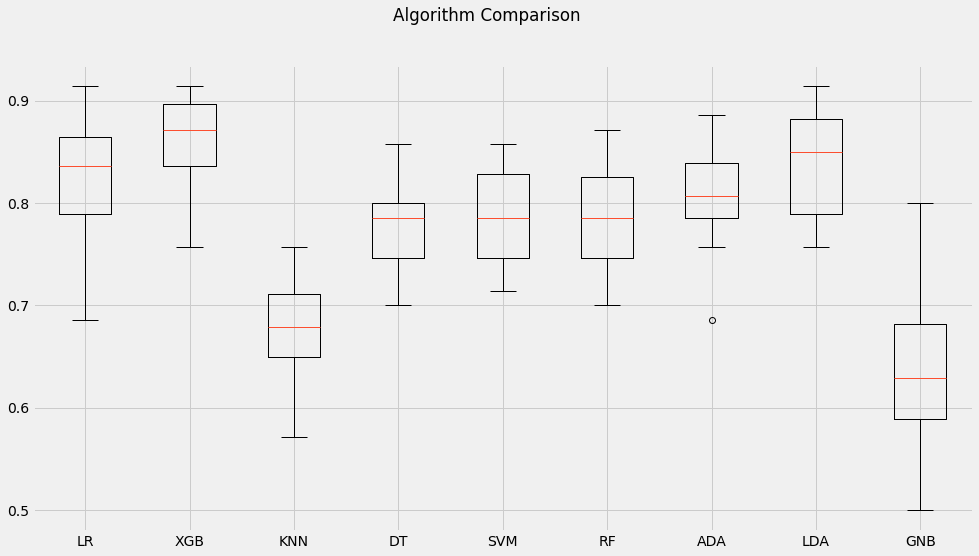

In [ ]:
models = []
models.append(('LR', LogisticRegressionCV(solver='lbfgs', max_iter=5000, cv=10)))
models.append(('XGB', XGBClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RF', RandomForestClassifier(n_estimators=200)))
models.append(('ADA', AdaBoostClassifier(n_estimators=200)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('GNB', GaussianNB()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
  kfold = model_selection.KFold(n_splits=10, random_state=seed)
  cv_results = model_selection.cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

# boxplot algorithm comparison
plt.rcParams['figure.figsize'] = [15, 8]
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
def auc_score(y_act, y_pred):
  return roc_auc_score(y_act, y_pred)
auc = make_scorer(auc_score)



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



LR: 0.752690 (0.062933)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



XGB: 0.829302 (0.056094)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



KNN: 0.501499 (0.033528)
DT: 0.732047 (0.054524)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



SVM: 0.624668 (0.038060)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



RF: 0.656893 (0.056501)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



ADA: 0.736640 (0.051547)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



LDA: 0.804712 (0.066285)
GNB: 0.645797 (0.076634)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



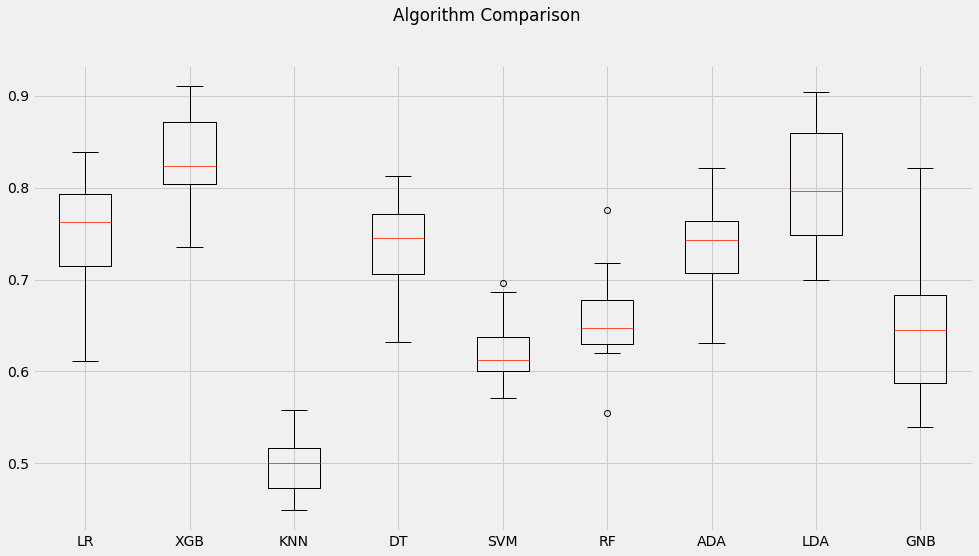

In [ ]:
models = []
models.append(('LR', LogisticRegressionCV(solver='lbfgs', max_iter=5000, cv=10)))
models.append(('XGB', XGBClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RF', RandomForestClassifier(n_estimators=200)))
models.append(('ADA', AdaBoostClassifier(n_estimators=200)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('GNB', GaussianNB()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
  kfold = model_selection.KFold(n_splits=10, random_state=seed)
  cv_results = model_selection.cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring=auc)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

# boxplot algorithm comparison
plt.rcParams['figure.figsize'] = [15, 8]
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
 clf1= LogisticRegressionCV(solver='lbfgs', max_iter=5000, cv=10)
clf2 = XGBClassifier()

clf = [
('LR', clf1),
('XGB', clf2)]

#create our voting classifier, inputting our models
eclf= VotingClassifier(estimators=[
('LR', clf1),
('XGB', clf2)], voting='hard')

for clf, label in zip([clf1, clf2, eclf], [
'Logistic Regression',
'XGB Classifier',
'Ensemble']):

   scores = cross_val_score(clf, X_train_scaled, y_train, cv=10, scoring=auc)
   print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.74 (+/- 0.07) [Logistic Regression]
Accuracy: 0.84 (+/- 0.04) [XGB Classifier]
Accuracy: 0.74 (+/- 0.07) [Ensemble]


In [ ]:
lda=LinearDiscriminantAnalysis()

In [ ]:
lda.get_params

<bound method BaseEstimator.get_params of LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)>

In [ ]:
best_lda=GridSearchCV(lda,param_grid={'solver':['svd','lsqr','eigen']},cv=5,scoring=auc,n_jobs=-1)

In [ ]:
%%time
best_lda.fit(X_train_scaled,y_train)

CPU times: user 154 ms, sys: 46.7 ms, total: 201 ms
Wall time: 1.5 s


GridSearchCV(cv=5, error_score=nan,
             estimator=LinearDiscriminantAnalysis(n_components=None,
                                                  priors=None, shrinkage=None,
                                                  solver='svd',
                                                  store_covariance=False,
                                                  tol=0.0001),
             iid='deprecated', n_jobs=-1,
             param_grid={'solver': ['svd', 'lsqr', 'eigen']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(auc_score), verbose=0)

In [ ]:
best_lda.best_params_

{'solver': 'svd'}

In [ ]:
y_pred=best_lda.predict(X_test_scaled)

In [ ]:
roc_auc_score(y_test,y_pred)

0.7562160062160062

In [ ]:
xgb=XGBClassifier()

In [ ]:
xgb.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)>

In [ ]:
params = {
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
    'n_estimators': [int(x) for x in np.linspace(start=100,stop=500, num=9)],'max_depth': [i for i in range(3, 10)],'min_child_weight': [i for i in range(1, 7)],'subsample': [i/10.0 for i in range(1,11)],
'colsample_bytree': [i/10.0 for i in range(1,11)]}

In [ ]:
best_xgb=RandomizedSearchCV(xgb,param_distributions=params,cv=5,scoring=auc,n_jobs=-1)

In [ ]:
%%time
best_xgb.fit(X_train_scaled,y_train)

CPU times: user 1.66 s, sys: 38.5 ms, total: 1.7 s
Wall time: 25.7 s


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                                             0.5, 0.6, 0.7, 0.8,
                                                             0.9, 1.0],
                        

In [ ]:
y_pred3=best_xgb.predict(X_test_scaled)

In [ ]:
best_xgb.best_params_

{'colsample_bytree': 0.9,
 'learning_rate': 0.001,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_estimators': 300,
 'subsample': 0.4}

In [ ]:
roc_auc_score(y_test,y_pred3)

0.8300310800310801

In [ ]:
accuracy_score(y_test,y_pred3)

0.8366666666666667

In [ ]:
cohen_kappa_score(y_test,y_pred3)

0.5810533515731875

In [ ]:
print('\n Classification Report:\n', classification_report(y_test, y_pred3))


 Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.84      0.89       234
           1       0.59      0.82      0.69        66

    accuracy                           0.84       300
   macro avg       0.77      0.83      0.79       300
weighted avg       0.87      0.84      0.85       300



In [ ]:
y_test.value_counts()

0    234
1     66
Name: fraud_reported, dtype: int64

In [ ]:
confusion_matrix(y_pred3,y_test)

array([[197,  12],
       [ 37,  54]])

AUC: 0.830


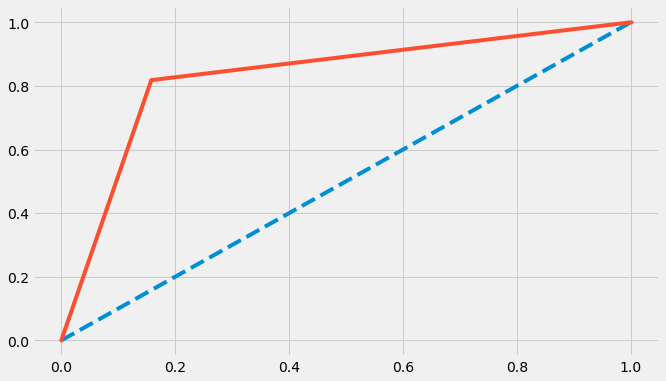

In [ ]:
# calculate AUC
auc = roc_auc_score(y_test, y_pred3)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)

# plot no skill
plt.rcParams['figure.figsize'] = [10, 6]
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')


In [ ]:
x=XGBClassifier(colsample_bytree = 0.9, learning_rate=0.01,max_depth =5,min_child_weight=1,n_estimators=300,subsample=0.4)
x.fit(X_train_scaled, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.4, verbosity=1)

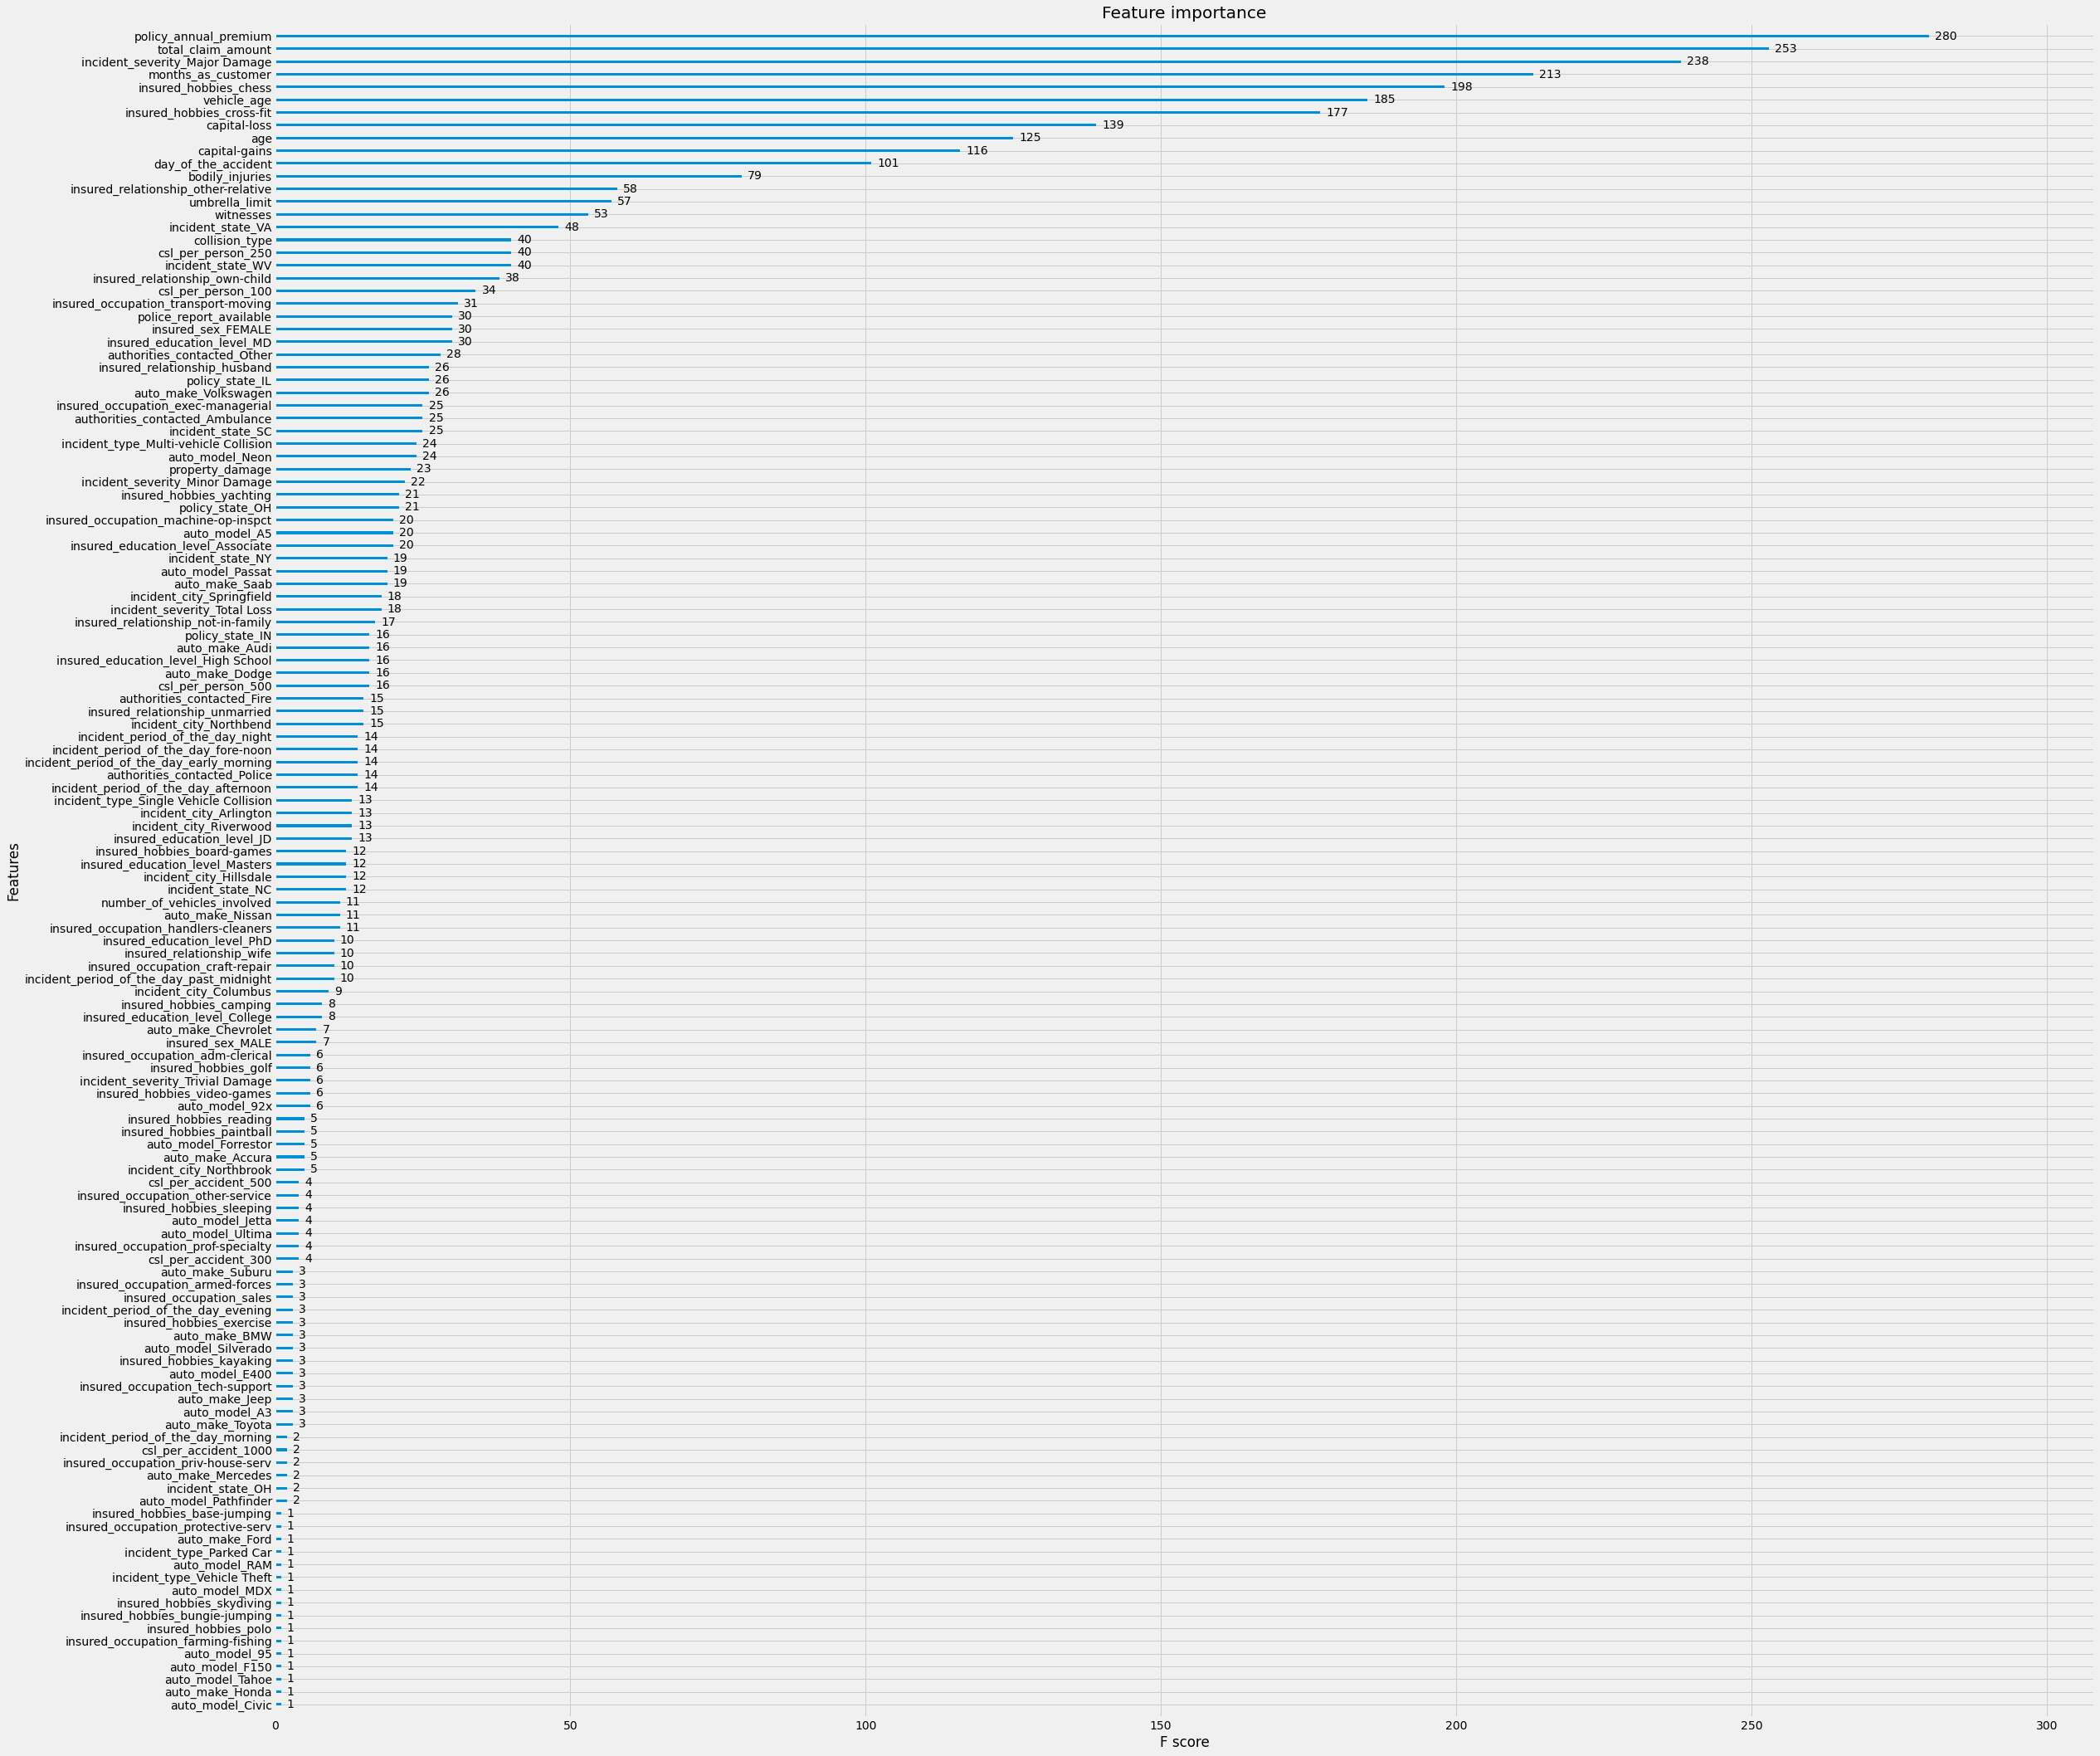

In [ ]:
plt.rcParams['figure.figsize'] = [35, 35]
plot_importance(x)